In [1]:
from qiskit import *

In [2]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

import numpy as np

from qiskit.providers.aer.noise import NoiseModel
from qiskit.aqua import QuantumInstance
from qiskit.providers.aer.noise import thermal_relaxation_error, ReadoutError, depolarizing_error

provider = IBMQ.get_provider(hub='ibm-q')
machine = provider.get_backend('ibmq_armonk')
from qiskit.test.mock import FakeLondon
machine_fake = FakeLondon()
machine_noise_model = NoiseModel.from_backend(machine)
simulator = Aer.get_backend('qasm_simulator')

C:\Users\Eesh Gupta\anacondaaa\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [3]:
import math

circ = QuantumCircuit(1,1)
points = 1000
for i in range(points): 
    circ.rx(math.pi, 0)
    circ.barrier(0)
#circ.rx(-math.pi/8, 0)
circ.measure(0,0)
#circ.draw(output = 'mpl')

In [4]:
circ2 = QuantumCircuit(1,1)
points = 1000
circ2.x(0)
circ2.barrier(0)
for i in range(points): 
    circ2.rx(math.pi, 0)
    circ2.barrier(0)
#circ2.rx(math.pi/8, 0)
circ2.measure(0,0)
#circ2.draw(output = 'mpl')

In [5]:
circuits = [circ, circ2]
labels = ['0 Rotation', '1 Rotation']

# Simulator

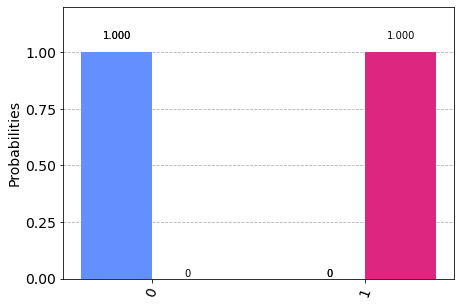

In [6]:
from qiskit.visualization import plot_histogram
job =  execute(circuits, backend = simulator, shots = 8192)
counts = job.result().get_counts()
plot_histogram(counts)


# Noise Model

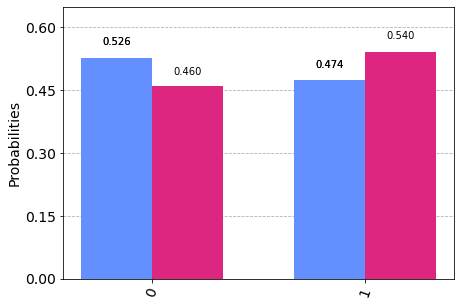

In [7]:
job =  execute(circuits, backend = simulator, noise_model = machine_noise_model,  shots = 1000000)
counts = job.result().get_counts()
plot_histogram(counts)

# Now doing for a bunch of angles

In [8]:
def countsToProb(counts, samples, invert): 
    '''
    Input: counts 
    Output: prob 
    '''
    result = (counts['0']/samples)
    if(invert):
        result = (counts['1']/samples)
    return result

In [9]:
def createCircuits(factor): 
    '''
    gives 2 circuits , one inverse of another
    '''
    circ = QuantumCircuit(1,1)
    points = 1000
    for i in range(points): 
        circ.rx((factor*math.pi)/(8*points), 0)
        circ.barrier(0)
    circ.rx(-(factor*math.pi)/8, 0)
    circ.measure(0,0)
    
    circ2 = QuantumCircuit(1,1)
    points = 1000
    circ2.x(0)
    circ2.barrier(0)
    for i in range(points): 
        circ2.rx((-factor*math.pi)/(8*points), 0)
        circ2.barrier(0)
    circ2.rx((factor*math.pi)/8, 0)
    circ2.measure(0,0)
    
    return [circ, circ2]

In [28]:
def evaluate(circuits, noise_model = None):
    samples = 100000
    job =  execute(circuits, backend = simulator, noise_model = noise_model,  shots = samples)
    counts = job.result().get_counts()
    print(counts)
    prob1 = countsToProb(counts[0], samples, False)
    prob2 = countsToProb(counts[1], samples, True)
    return prob1, prob2

In [31]:
probs1 = []
probs2 = []
factors = [i for i in range(1,)]
for i in factors:
    circuits = createCircuits(i)
    prob1, prob2 = evaluate(circuits, noise_model = machine_noise_model)
    probs1.append(prob1)
    probs2.append(prob2)

    

[{'0': 77049, '1': 22951}, {'0': 70277, '1': 29723}]
[{'0': 74254, '1': 25746}, {'0': 67312, '1': 32688}]
[{'0': 69773, '1': 30227}, {'0': 62586, '1': 37414}]
[{'0': 64146, '1': 35854}, {'0': 56762, '1': 43238}]
[{'0': 57623, '1': 42377}, {'0': 50331, '1': 49669}]
[{'0': 51442, '1': 48558}, {'0': 44180, '1': 55820}]
[{'0': 45869, '1': 54131}, {'0': 38532, '1': 61468}]
[{'0': 41373, '1': 58627}, {'0': 33683, '1': 66317}]
[{'0': 38373, '1': 61627}, {'0': 31516, '1': 68484}]
[{'0': 37405, '1': 62595}, {'0': 30044, '1': 69956}]
[{'0': 38090, '1': 61910}, {'0': 31087, '1': 68913}]
[{'0': 40437, '1': 59563}, {'0': 33391, '1': 66609}]
[{'0': 43940, '1': 56060}, {'0': 36669, '1': 63331}]
[{'0': 48199, '1': 51801}, {'0': 40941, '1': 59059}]
[{'0': 52516, '1': 47484}, {'0': 45094, '1': 54906}]
[{'0': 56417, '1': 43583}, {'0': 49246, '1': 50754}]
[{'0': 59463, '1': 40537}, {'0': 51988, '1': 48012}]
[{'0': 60989, '1': 39011}, {'0': 54086, '1': 45914}]
[{'0': 61751, '1': 38249}, {'0': 54279, '1': 4

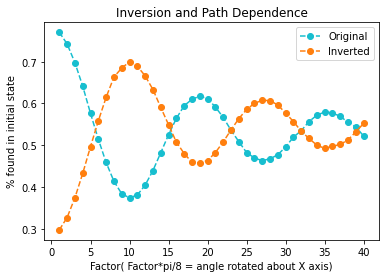

In [37]:
import matplotlib.pyplot as plt
a = plt.figure()
plt.plot(factors, probs1, linestyle = '--', marker = 'o', color = 'tab:cyan', label = 'Original')
plt.plot(factors, probs2, linestyle = '--', marker = 'o', color = 'tab:orange', label = 'Inverted')
plt.xlabel('Factor( Factor*pi/8 = angle rotated about X axis)')
plt.ylabel('% found in initial state')
plt.legend()
plt.title('Inversion and Path Dependence')
a.savefig('Sept23(1).png', dpi = 1000)

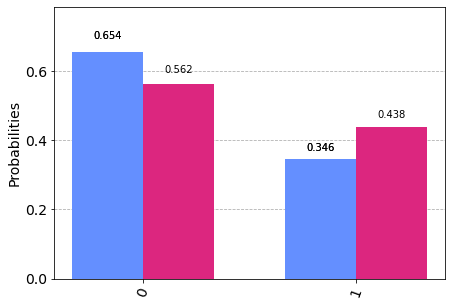

In [36]:
circuits = createCircuits(4)
job =  execute(circuits, backend = simulator, noise_model = machine_noise_model,  shots = 1000)
counts = job.result().get_counts()
plot_histogram(counts)